<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Simple example of a Markov chain 



# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

import quantecon as qe
from quantecon import MarkovChain
import networkx as nx
from pprint import pprint 

import pyflux as pf
from scipy.stats import kurtosis

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Bayesian Approach and Markov chain
<hr style = "border:2px solid black" ></hr>


- The way we approach probability is of central importance in the sense that it distin‐ guishes the classical (or Frequentist) and Bayesian approaches. 
- According to the former, the relative frequency will converge to the true probability. However, a Bayesian application is based on the subjective interpretation. 
- Unlike the Frequentists, Bayesian statisticians consider the probability distribution as uncertain, and **it is revised as new information comes in**.




- Bayes’ theorem is attractive but it comes with a cost, which is analytical intractability and hard to solve analytically. However, there are methods used to approximate this computational issues: 
    - Quadrature approximation
    - Maximum a posteriori estimation (MAP)
    - Grid approach
    - Sampling-based approach
    - Metropolis–Hastings
    - Gibbs sampler
    - No U-Turn sampler
    



- Both Metropolis–Hastings and Gibbs sampler rests on the Markov chain Monte Carlo (MCMC) method.
- The Markov chain is a model used to describe the transition probabilities among states. A chain is called Markovian if the probability of the current state st depends only on the most recent state.
- In a nutshell, the MCMC method helps us gather IID samples from posterior density so that we can calculate the poste‐ rior probability.
    


In [2]:
P = [[0.5, 0.2, 0.3],
     [0.2, 0.3, 0.5],
     [0.2, 0.2, 0.6]]

mc = qe.MarkovChain(P, ('studying', 'travelling', 'sleeping'))
mc.is_irreducible

True

In [3]:
states = ['studying', 'travelling', 'sleeping']
initial_probs = [0.5, 0.3, 0.6]
state_space = pd.Series(initial_probs, index=states, name='states')

In [4]:
q_df = pd.DataFrame(columns=states, index=states)
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.5, 0.2, 0.3]
q_df.loc[states[1]] = [0.2, 0.3, 0.5]
q_df.loc[states[2]] = [0.2, 0.2, 0.6]

In [5]:
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges
edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('sleeping', 'sleeping'): 0.6,
 ('sleeping', 'studying'): 0.2,
 ('sleeping', 'travelling'): 0.2,
 ('studying', 'sleeping'): 0.3,
 ('studying', 'studying'): 0.5,
 ('studying', 'travelling'): 0.2,
 ('travelling', 'sleeping'): 0.5,
 ('travelling', 'studying'): 0.2,
 ('travelling', 'travelling'): 0.3}


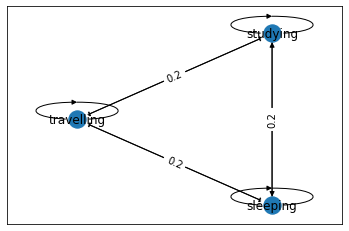

In [6]:
G = nx.MultiDiGraph()
G.add_nodes_from(states)
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)
edge_labels = {(n1, n2):d['label'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'mc_states.dot')

# References
<hr style = "border:2px solid black" ></hr>


- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_4.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan

